### Rose Tovar
### TMDB Visual Exporlatory
### 9/21/2022

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [4]:
FOLDER = 'Data/'
q = FOLDER + 'final*.csv.gz'
q

'Data/final*.csv.gz'

In [5]:
file_list = glob.glob(q)
file_list

['Data/final_tmdb_data_2008.csv.gz',
 'Data/final_tmdb_data_2000.csv.gz',
 'Data/final_tmdb_data_2006.csv.gz',
 'Data/final_tmdb_data_2021.csv.gz',
 'Data/final_tmdb_data_2017.csv.gz',
 'Data/final_tmdb_data_2009.csv.gz',
 'Data/final_tmdb_data_2012.csv.gz',
 'Data/final_tmdb_data_2013.csv.gz',
 'Data/final_tmdb_data_2016.csv.gz',
 'Data/final_tmdb_data_2020.csv.gz',
 'Data/final_tmdb_data_2022.csv.gz',
 'Data/final_tmdb_data_2010.csv.gz',
 'Data/final_tmdb_data_2018.csv.gz',
 'Data/final_tmdb_data_2002.csv.gz',
 'Data/final_tmdb_data_2001.csv.gz',
 'Data/final_tmdb_data_2015.csv.gz',
 'Data/final_tmdb_data_2005.csv.gz',
 'Data/final_tmdb_data_2014.csv.gz',
 'Data/final_tmdb_data_2003.csv.gz',
 'Data/final_tmdb_data_2011.csv.gz',
 'Data/final_tmdb_data_2004.csv.gz',
 'Data/final_tmdb_data_2019.csv.gz',
 'Data/final_tmdb_data_2007.csv.gz']

In [7]:
full_movie_data = pd.concat([pd.read_csv(file,lineterminator='\n') for file in file_list])
full_movie_data.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0119970,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,165200.0,en,My Apocalypse,...,0.0,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The future looks bleak,My Apocalypse,0.0,4.80,2.0,NaN
2,tt0166069,0.0,/rSbIlptJcd2TgoSB8YVgiJJKaSq.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",http://tsukamotoshinya.net/contents/?p=103,69469.0,ja,電柱小僧の冒険,...,0.0,47.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,The Adventure of Denchu-Kozo,0.0,6.10,25.0,NaN
3,tt0177636,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,8890.0,de,Geliebte Clara,...,0.0,107.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Clara,0.0,4.70,6.0,NaN
4,tt0200465,0.0,/ynnarxTMs8jWKV9GK0SpUhGNCgH.jpg,NaN,20000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",http://thebankjobmovie.com/,8848.0,en,The Bank Job,...,64828421.0,112.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The true story of a heist gone wrong... in all...,The Bank Job,0.0,6.82,1834.0,R


In [8]:
full_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2572 entries, 1 to 1321
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2572 non-null   object 
 1   adult                  2572 non-null   float64
 2   backdrop_path          1316 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 2572 non-null   float64
 5   genres                 2572 non-null   object 
 6   homepage               180 non-null    object 
 7   id                     2572 non-null   float64
 8   original_language      2572 non-null   object 
 9   original_title         2572 non-null   object 
 10  overview               2516 non-null   object 
 11  popularity             2572 non-null   float64
 12  poster_path            2252 non-null   object 
 13  production_companies   2572 non-null   object 
 14  production_countries   2572 non-null   object 
 15  rele

In [9]:
# remove ids that are 0  and then reset index
full_movie_data = full_movie_data.loc[full_movie_data['imdb_id']!='0'].reset_index(drop=True)
full_movie_data

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
0,tt0119970,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,165200.0,en,My Apocalypse,...,0.0,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The future looks bleak,My Apocalypse,0.0,4.800,2.0,NaN
1,tt0166069,0.0,/rSbIlptJcd2TgoSB8YVgiJJKaSq.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",http://tsukamotoshinya.net/contents/?p=103,69469.0,ja,電柱小僧の冒険,...,0.0,47.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,The Adventure of Denchu-Kozo,0.0,6.100,25.0,NaN
2,tt0177636,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,8890.0,de,Geliebte Clara,...,0.0,107.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Clara,0.0,4.700,6.0,NaN
3,tt0200465,0.0,/ynnarxTMs8jWKV9GK0SpUhGNCgH.jpg,NaN,20000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",http://thebankjobmovie.com/,8848.0,en,The Bank Job,...,64828421.0,112.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The true story of a heist gone wrong... in all...,The Bank Job,0.0,6.820,1834.0,R
4,tt0211946,0.0,/8ZoW4hwuTWxKWDezkoUGBVvyxj5.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.berlin-calling.de/,30508.0,de,Berlin Calling,...,0.0,105.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Berlin Calling,0.0,6.846,286.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63180,tt8936254,0.0,NaN,"{'id': 728953, 'name': 'Fallen', 'poster_path'...",7000000.0,"[{'id': 14, 'name': 'Fantasy'}]",NaN,601644.0,en,Fallen II: The Journey,...,0.0,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Fallen II: The Journey,0.0,7.700,14.0,NaN
63181,tt9271828,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,561544.0,en,Fred Baker - filmmaker,...,0.0,59.0,[],Released,NaN,Fred Baker - filmmaker,0.0,0.000,0.0,NaN
63182,tt9609716,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,360609.0,cn,一樓1鬼,...,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,House of the Invisibles,0.0,0.000,0.0,NaN
63183,tt9643108,0.0,/zBXF10KsBVTCLivZIftV8tklsi6.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,592305.0,ja,国道20号線,...,0.0,77.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,The Route 20 National Road,0.0,5.000,3.0,NaN


### Downloading Combined copy of dataframe

In [10]:
full_movie_data.to_csv(f"Data/tmdb_results_combined.csv.gz", compression="gzip", index=False)


### Data Visualization

In [11]:
# Setting up Visualization Features
# Setting up Default Settings for plots
sns.set_context('talk')
plt.style.use(['bmh', 'seaborn'])
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.grid'] = False

In [13]:
valid_budget = full_movie_data[(full_movie_data['budget'] > 0) & (full_movie_data['revenue'] > 0)]
# We have 349 movies left for valid budgets and revenue
valid_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5203 entries, 3 to 63118
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                5203 non-null   object 
 1   adult                  5203 non-null   float64
 2   backdrop_path          4979 non-null   object 
 3   belongs_to_collection  1144 non-null   object 
 4   budget                 5203 non-null   float64
 5   genres                 5203 non-null   object 
 6   homepage               2447 non-null   object 
 7   id                     5203 non-null   float64
 8   original_language      5203 non-null   object 
 9   original_title         5203 non-null   object 
 10  overview               5193 non-null   object 
 11  popularity             5203 non-null   float64
 12  poster_path            5167 non-null   object 
 13  production_companies   5203 non-null   object 
 14  production_countries   5203 non-null   object 
 15  rel

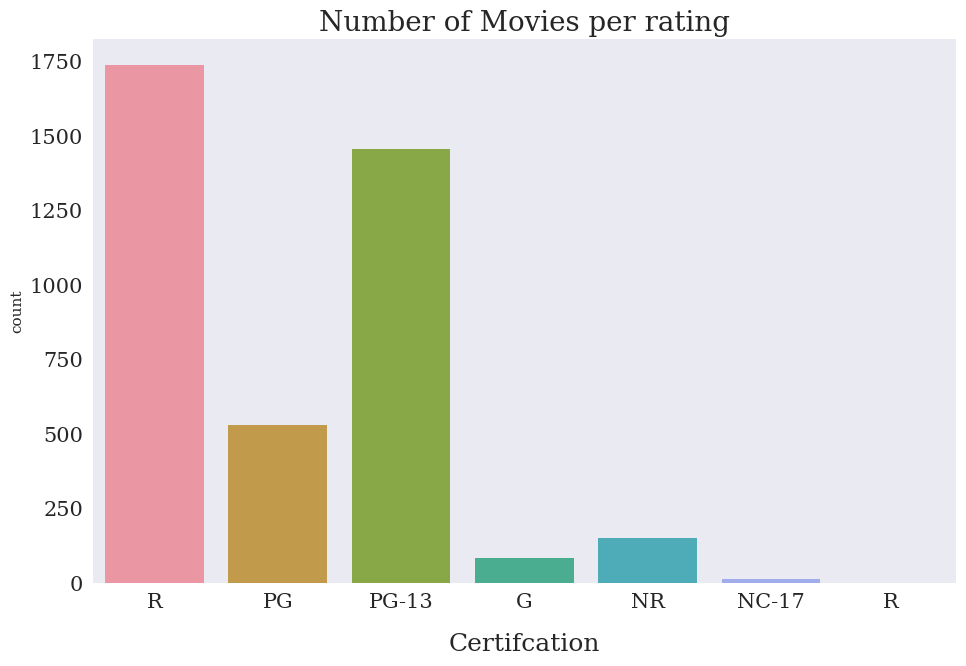

In [14]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=valid_budget, x='certifcation', ax=ax)
ax.set_xlabel("Certifcation", fontsize=18,labelpad=15)
ax.set_title('Number of Movies per rating', fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.tight_layout()

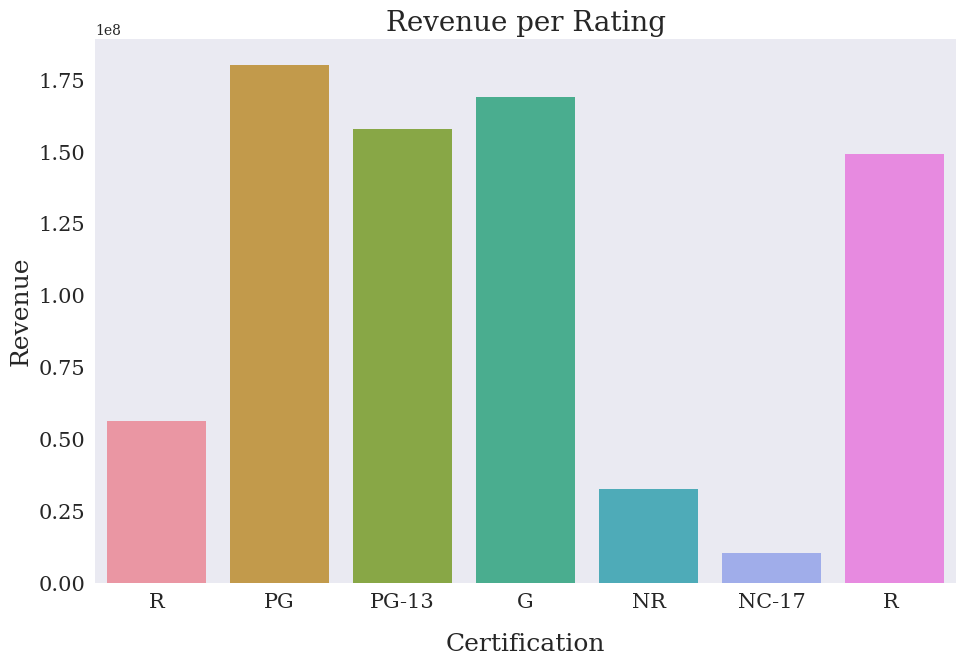

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=valid_budget, x='certifcation',y='revenue',ci=None)
ax.set_xlabel('Certification', fontsize=18, labelpad=15)
ax.set_ylabel("Revenue", fontsize=18)
ax.set_title('Revenue per Rating', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

### Analysis

On Avearage rated PG movies made about 130,000,000 in revenue, The rated R movies made around 60,000,000, Rated G movies made around 130,000,000, PG-13 made around 110,000,000, and finally NR made 20,000,000 in revenue

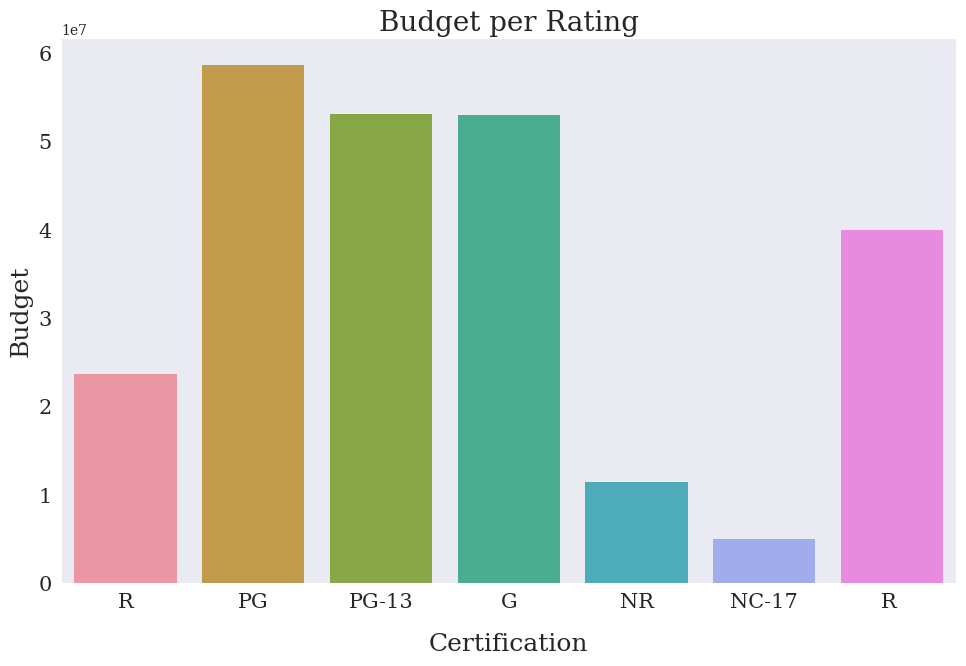

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=valid_budget, x='certifcation',y='budget',ci=None)
ax.set_xlabel('Certification', fontsize=18, labelpad=15)
ax.set_ylabel("Budget", fontsize=18)
ax.set_title('Budget per Rating', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#### Analysis

We have about 50,000,000 million for spent on PG Movies, just about 30,000,000, for rated R, 40,000,000, on G and PG-13 Movies, and finally 15,000,000, on NR Movies. 